
Assignment 2 is due 2/28/17. You can find the raw .Rmd file at: [https://raw.githubusercontent.com/idc9/stor390/master/assignments/harry_potter/harry_potter.Rmd](https://raw.githubusercontent.com/idc9/stor390/master/assignments/harry_potter/harry_potter.Rmd).

The text of all 7 Harry Potter books is available online: [http://www.readfreeonline.net/Author/J._K._Rowling/Index.html](http://www.readfreeonline.net/Author/J._K._Rowling/Index.html) (very possible the website is now defunct). In this assignment you will use dplyr, ggplot and regular expressions to do an exploratory analysis of Harry Potter and the Philosopher's Stone.

Here are a couple examples of similar text analysis projects (that you will be able to do in a couple weeks!)

- [The Life-Changing Magic of Tidying Text](http://juliasilge.com/blog/Life-Changing-Magic/) by Julia Silge (yes [janeaustenr](https://github.com/juliasilge/janeaustenr) is an entire R package devoted to Jane Austen)

- [Harry Potter agression](https://github.com/andrewheiss/Harry-Potter-aggression) by Andrew Heiss


# Question 0
Set `eval=FALSE` for the chunk above and `eval=TRUE`for the chunk below and all test chunks. The text file comes with the Sakai announcement.


In [1]:
# set up
library(tidyverse)
library(stringr)
text <- read_file('philosophers_stone.txt')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats



# Question 1
How many words are in the book?



In [2]:
text %>%
  str_count("\\w+") %>%
  sum()

[1] 80607



# Question 2

How many times are each of the following characters mentioned? Display the answer using an appropriate visualization.

- Harry, Hermione, Ron, Neville, Dumbledore, Draco, Snape, Hagrid, McGonagall


*Hint*: the `map` function might be helpful (but not necessary).




name       count
1 Harry      1325 
2 Hermione    270 
3 Ron         454 
4 Neville     117 
5 Dumbledore  157 
6 Draco        11 
7 Snape       172 
8 Hagrid      370 
9 McGonagall  101

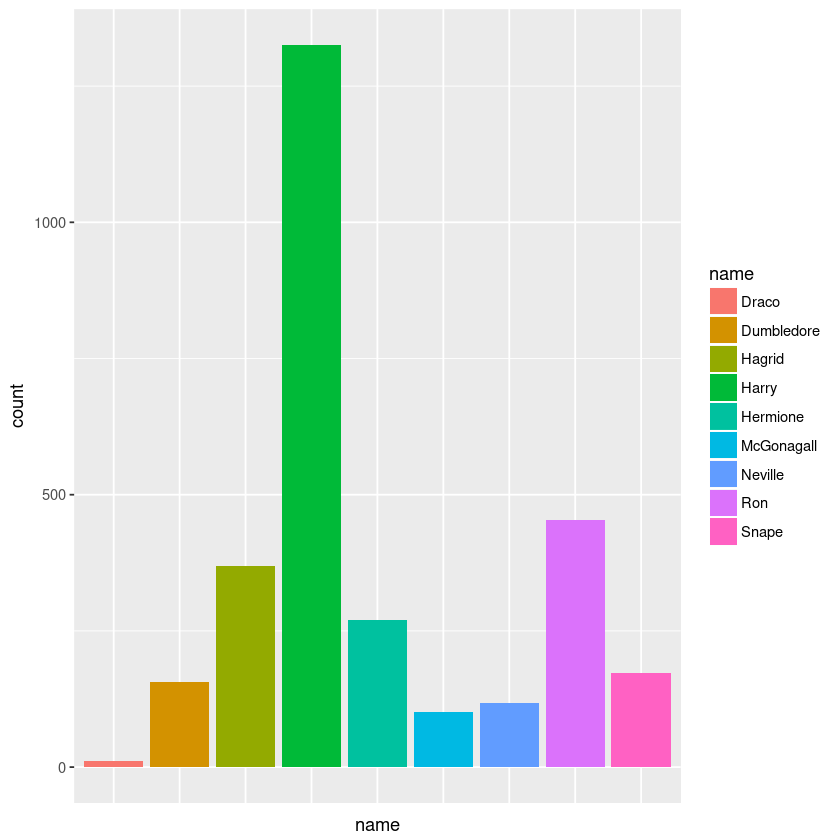

In [3]:
people <- c('Harry', 'Hermione', 'Ron', 'Neville', 'Dumbledore', 'Draco', 'Snape', 'Hagrid', 'McGonagall')
characters <- tibble(name = factor(people), count = str_count(text, people))
characters
ggplot(characters, aes(x = name, y = count, fill = name)) +
  geom_bar(stat = 'identity') +
  theme(axis.ticks.x=element_blank(),
        axis.text.x=element_blank())









# Question 3
Break the text into paragraphs; create a vector called `paragraphs` where each entry is a paragraph in the book.




In [4]:
# assume paragraphs end with \\\r\\\n
paragraphs <- text %>%
  str_c() %>%
  str_split('\\r\\n') %>%
  unlist()



# Question 4
Write a function that can break the text up into paragraphs, sentences, or words. This is a preview of [what you'll be doing](http://tidytextmining.com/tidytext.html#the-unnest_tokens-function) in a couple weeks.

This function does not need to be perfect. For sentences, give one example where the function you wrote fails.

*Hint*: the function should probably have a if statement


In [5]:
unnest_tokens <- function(text, token='words'){
  # splits a string into tokens
  # input
  # text is a string
  # token can be one of: words, paragraphs, sentences
  # output: a character vector
  delimiter <- ''
  if (token == 'words')
    delimiter <- '[^a-zA-Z\']+'
  else if (token == 'paragraphs')
    delimiter <- '\\r\\n'
  else if (token == 'sentences')
    delimiter <- '(?<=[.?!])[\\s\\r\\n]+'
  else return(NULL)
  text %>%
    str_split(delimiter) %>%
    unlist()
}

In [6]:
# TODO add more
# Test code for the grader -- you don't have to modify these
sum(paragraphs == unnest_tokens(text, 'paragraphs'))

[1] 3014



# Question 5

Put the data into tidy format with one row per paragraph.

- first remove all paragraphs length 0
- create a tibble called `paragraph_df` with one column `text` with the text of each paragraph (*hint*: you might need to use `as.character(paragraphs)`)
- add a new column `index` that gives the index of each paragraph
- **wighout** using dplyr add a column called `Harry` that counts the number of times Harry is referenced in each paragraph




In [7]:
paragraph_df <- tibble(text = as.character(paragraphs),
                       index = 1:length(paragraphs),
                       Harry = str_count(paragraphs, 'Harry'))


*Hint*: you can use question 2 to check your answer

# Question 6
Write a function called `reference_counter` that generalizes question 5 for any tidy text data frame and any list of words.

*Hint*: do this **without** dplyr



In [8]:

reference_counter <- function(text_df, word_list){

  # inputs
  # text_df is a tibble with a column called text
  # word_list is a vector of strings
  # for each word in word_list add a column to text_df counting
  # the number of times that word appears in each row of text df
  # does not modify the original text_df
  # do this WITHOUT using dplyr
  res <- text_df
  for (word in word_list)
    res[[word]] <- str_count(res$text, word)
  return(res)
}

In [9]:
# test code for grader
test_words <- c('Harry', 'Hagrid', 'wand')
test_df <- reference_counter(paragraph_df, test_words)
test_df %>% select(Harry, Hagrid, wand) %>% summarise_all(sum)

Harry Hagrid wand
1 1325  370    83




# Question 7

Using the `reference_counter` function update `paragraph_df` to include columns counting the number of references to each characters from Q2 in each paragraph




In [10]:
paragraph_df <- reference_counter(paragraph_df, people)

In [11]:
# test code for grader
paragraph_df[,people] %>% summarise_all(sum)
paragraph_df

Harry Hermione Ron Neville Dumbledore Draco Snape Hagrid McGonagall
1 1325  270      454 117     157        11    172   370    101

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1    THE BOY WHO LIVED                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2    　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3    　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
4    　　The Dursleys had everything they w



# Question 8

Make a new data frame called `person_refs`  with three columns: person, num_refs, index. num_refs is the number of references each person gets in paragraph and index is the index of the paragraph. Limit this data frame to the following 5 characters: Harry, Hermione, Ron, Draco, Neville.

*Hint*: use `gather`.



In [12]:
person_refs <- paragraph_df %>%
  select(index, Harry, Hermione, Ron, Draco, Neville) %>%
  gather(Harry, Hermione, Ron, Draco, Neville,
         key = 'person', value = 'num_refs')



Make a bar plot showing the number of paragraphs that references each of the 5 characters



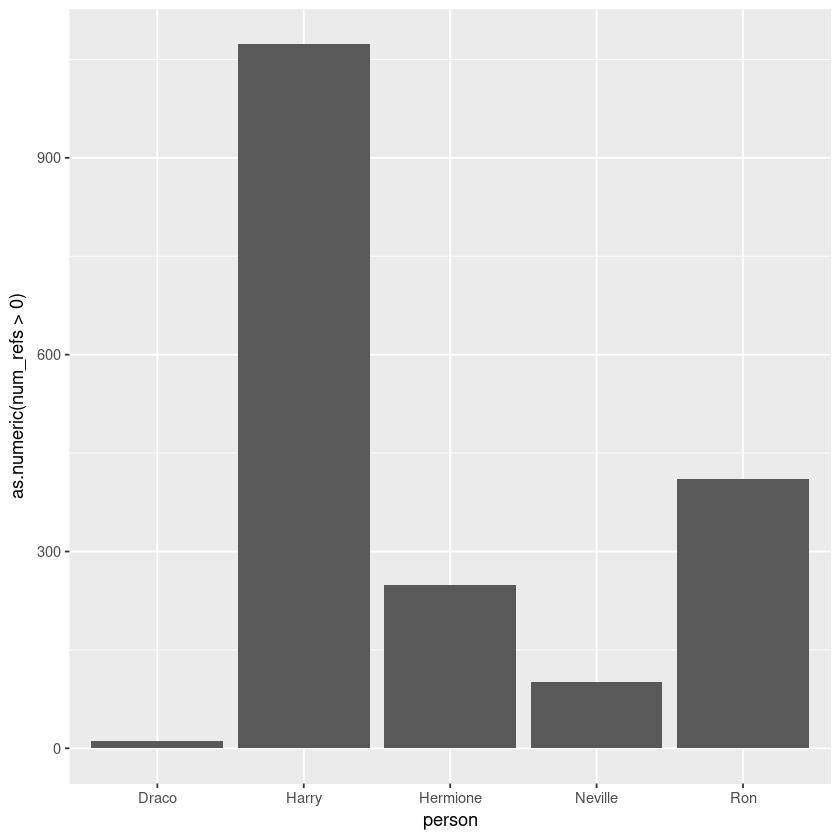

In [13]:
ggplot(person_refs, aes(x = person, y = as.numeric(num_refs > 0))) +
  geom_bar(stat = 'identity')



Now we want to examine how characters evolve over "time." Plot the number of references vs. the paragraph index.



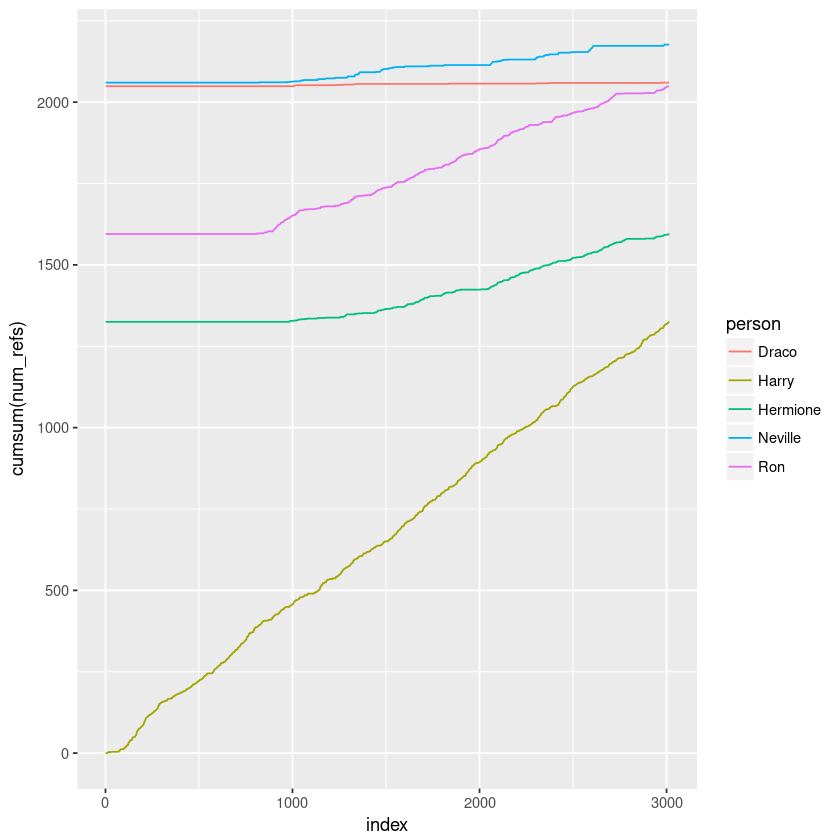

In [14]:
ggplot(person_refs, aes(x = index, y = cumsum(num_refs), color = person)) +
  geom_line()


In this question we are using paragraphs for "time windows." What are other "time windows" we could have used? What are some trade offs for these different choices.

We could have used lines, words or sentences. Lines or words would be more consistent as a method of "timekeeping" since the length is more consistent, but being smaller they would leave larger gaps in the data.

# Question 9
How often are Harry and Herminone referenced together? Plot the number of references per paragraph for Harry vs. Herminone.

- one plot using `geom_point`
- one plot using `geom_jitter` (use the width/height arguments of jitter to make the jitter plot look better)




[1] 120

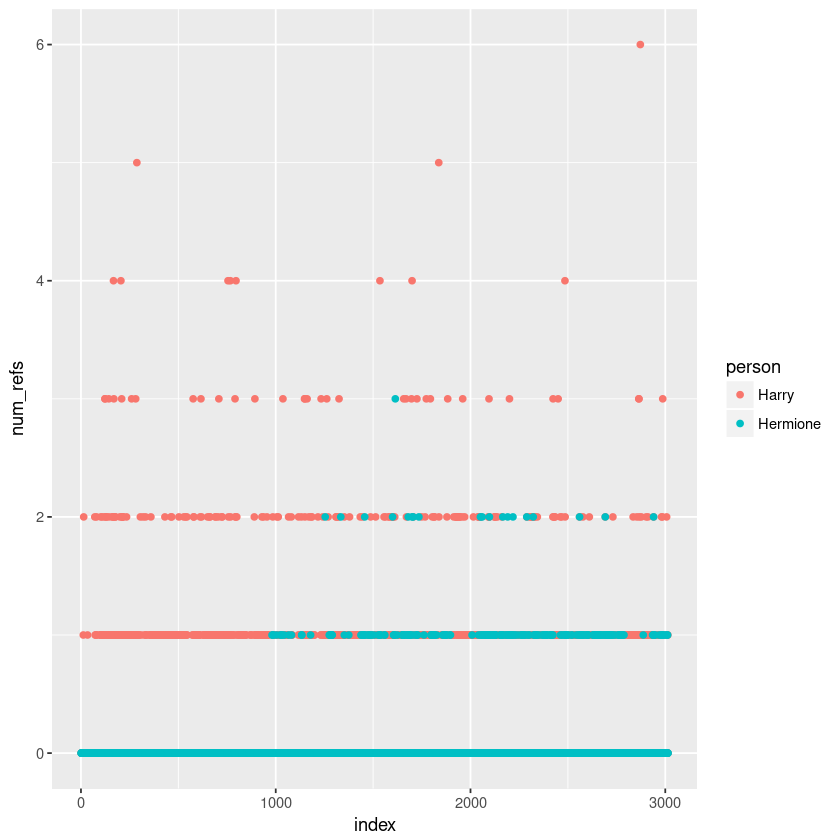

In [15]:
tmp <- paragraph_df %>%
  filter(Harry > 0 & Hermione > 0)
length(tmp$index)

ggplot(filter(person_refs, person == 'Harry' | person == 'Hermione'), aes(x = index, y = num_refs, color = person)) +
  geom_point()

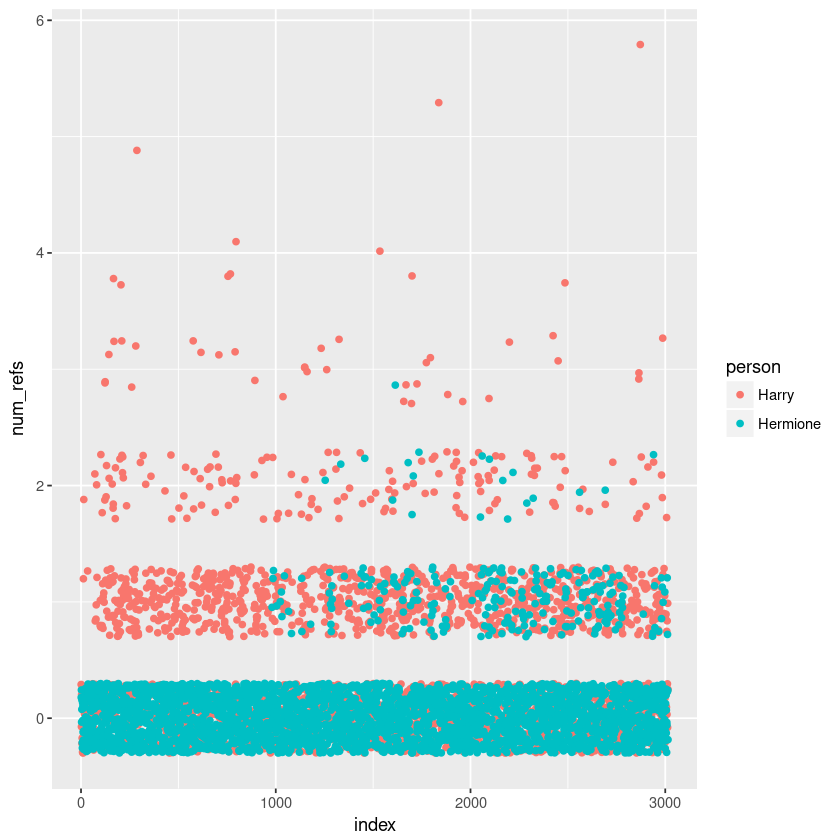

In [16]:
ggplot(filter(person_refs, person == 'Harry' | person == 'Hermione'), aes(x = index, y = num_refs, color = person)) +
  geom_jitter(width = .3, height = .3)



Why is the jitter plot better than a simple point plot?

When both characters have the same number of mentions in a given paragraph, one of the points will cover the other, obscuring the data. The jitter eliminates this problem.


# Question 10
Do Harry and Hermione tend to co-occur?  Fit a linear regression of Harry vs. Hermione references per paragraph. Use the `lm()` function and print out the `summary` of the model.




In [17]:
lm(Hermione ~ Harry, paragraph_df) %>%
  summary()


Call:
lm(formula = Hermione ~ Harry, data = paragraph_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32008 -0.11281 -0.07136 -0.07136  2.88719 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.071359   0.006691  10.665  < 2e-16 ***
Harry       0.041453   0.008236   5.033 5.12e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3089 on 3012 degrees of freedom
Multiple R-squared:  0.008339,	Adjusted R-squared:  0.00801 
F-statistic: 25.33 on 1 and 3012 DF,  p-value: 5.116e-07




Now use `geom_smooth` to plot the linear regression line on top of the jitter plot.



`geom_smooth()` using method = 'gam'


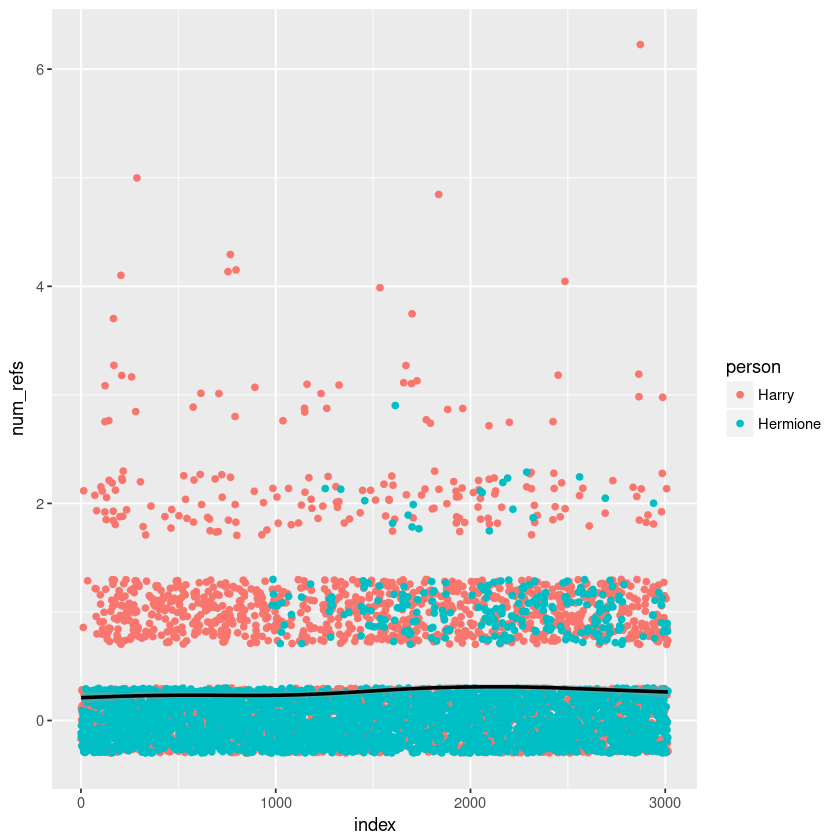

In [18]:
ggplot(filter(person_refs, person == 'Harry' | person == 'Hermione'), aes(x = index, y = num_refs, color = person)) +
  geom_jitter(width = .3, height = .3) +
  geom_smooth(color = 'black')



# Question 11
Is there are relationship between the length of the paragraph a the number of times Harry is mentioned? Add a column called `num_words` to `paragraph_df` counting the number of words in each paragraph. Then use a linear regression to answer for the question. Provide both a statistical summary and a visualization.





Call:
lm(formula = Harry ~ num_words, data = paragraph_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1961 -0.3666 -0.2259  0.5035  5.1246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.1500958  0.0163811   9.163   <2e-16 ***
num_words   0.0108255  0.0004412  24.537   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6238 on 3012 degrees of freedom
Multiple R-squared:  0.1666,	Adjusted R-squared:  0.1663 
F-statistic: 602.1 on 1 and 3012 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'gam'


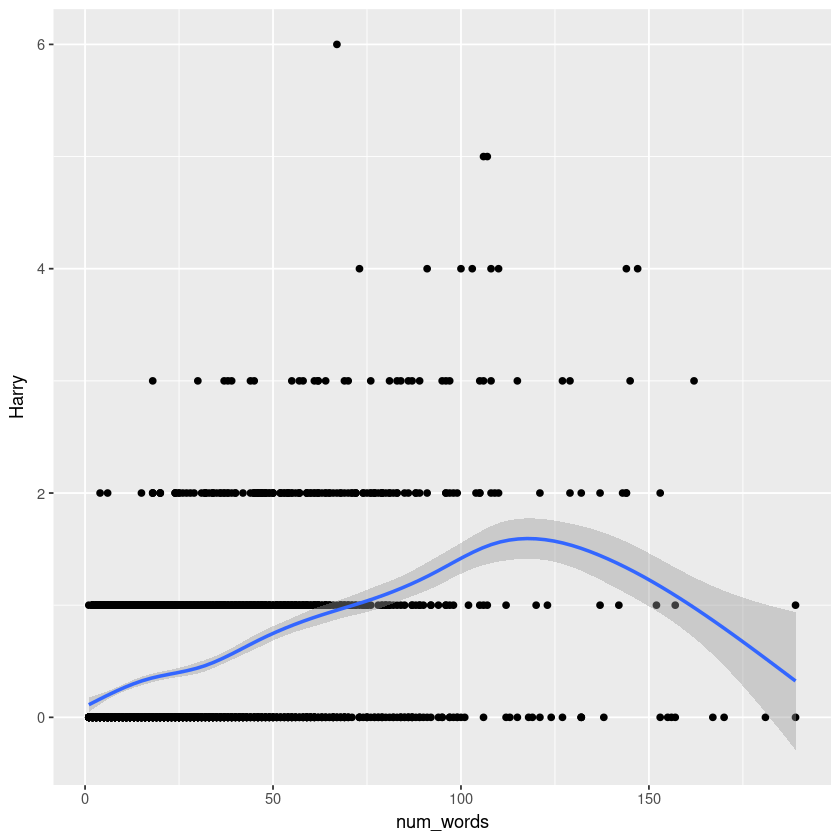

In [19]:
paragraph_df <- paragraph_df %>%
  mutate(num_words = str_count(text, "\\w+"))
lm(Harry ~ num_words, paragraph_df) %>%
  summary()
ggplot(paragraph_df, aes(x = num_words, y = Harry)) +
  geom_point() +
  geom_smooth()



# Question 12
Create an indicator variable `harry_mentioned` that indicates whether or not Harry is mentioned in each paragraph. This indicator variable should be a factor (e.g. use `as.factor`).



In [20]:
paragraph_df <- paragraph_df %>%
  mutate(harry_mentioned = as.factor(Harry > 0))
paragraph_df
person_refs

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1    THE BOY WHO LIVED                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2    　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3    　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
4    　　The Dursleys had everything they w

index person  num_refs
1      1    Harry   0       
2      2    Harry   0       
3      3    Harry   0       
4      4    Harry   0       
5      5    Harry   0       
6      6    Harry   0       
7      7    Harry   0       
8      8    Harry   0       
9      9    Harry   0       
10    10    Harry   0       
11    11    Harry   0       
12    12    Harry   1       
13    13    Harry   0       
14    14    Harry   2       
15    15    Harry   0       
16    16    Harry   0       
17    17    Harry   0       
18    18    Harry   0       
19    19    Harry   0       
20    20    Harry   0       
21    21    Harry   0       
22    22    Harry   0       
23    23    Harry   0       
24    24    Harry   0       
25    25    Harry   0       
26    26    Harry   0       
27    27    Harry   0       
28    28    Harry   0       
29    29    Harry   0       
30    30    Harry   0       
⋮     ⋮     ⋮       ⋮       
15041 2985  Neville 1       
15042 2986  Neville 0       
15043 2987  Neville 0       
15044 2988  Neville 0       
15045 2989  Neville 1       
15046 2990  Neville 1       
15047 2991  Neville 0       
15048 2992  Neville 0       
15049 2993  Neville 0       
15050 2994  Neville 0       
15051 2995  Neville 0       
15052 2996  Neville 0       
15053 2997  Neville 0       
15054 2998  Neville 0       
15055 2999  Neville 0       
15056 3000  Neville 0       
15057 3001  Neville 0       
15058 3002  Neville 0       
15059 3003  Neville 0       
15060 3004  Neville 0       
15061 3005  Neville 0       
15062 3006  Neville 0       
15063 3007  Neville 0       
15064 3008  Neville 0       
15065 3009  Neville 0       
15066 3010  Neville 0       
15067 3011  Neville 0       
15068 3012  Neville 0       
15069 3013  Neville 0       
15070 3014  Neville 0


Now repeat the previous linear regression with `harry_mentioned` as the x variable instead of the number of times he is mentioned




Call:
lm(formula = num_words ~ harry_mentioned, data = paragraph_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.291 -15.467  -7.467   8.709 167.533 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          21.4668     0.5622   38.19   <2e-16 ***
harry_mentionedTRUE  14.8240     0.9422   15.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.77 on 3012 degrees of freedom
Multiple R-squared:  0.07595,	Adjusted R-squared:  0.07564 
F-statistic: 247.5 on 1 and 3012 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'gam'


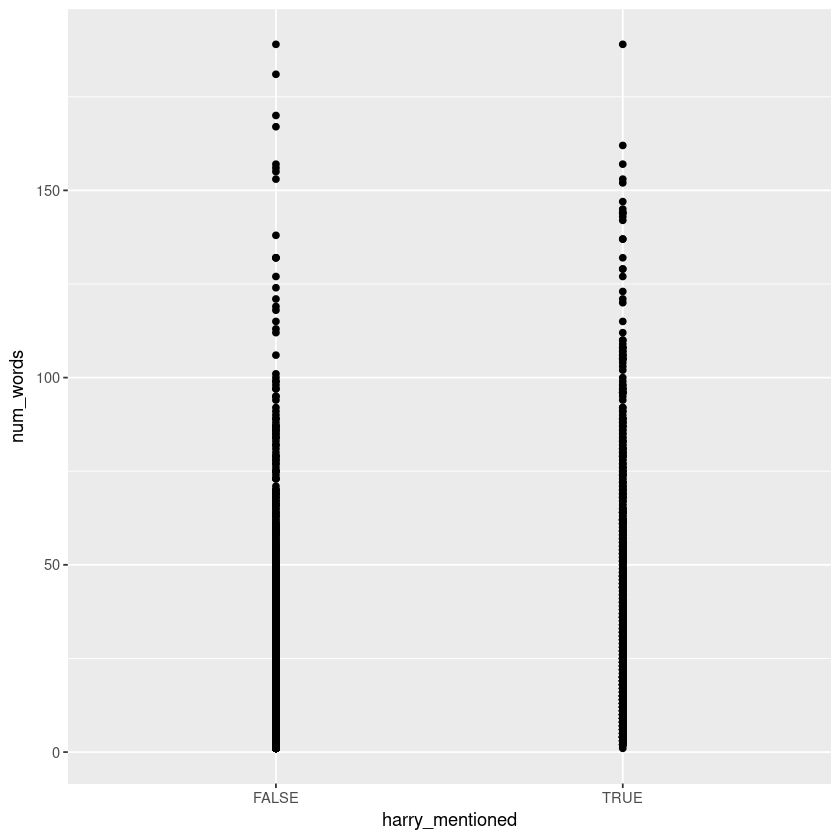

In [21]:
lm(num_words ~ harry_mentioned, paragraph_df) %>%
  summary()
ggplot(paragraph_df, aes(x = harry_mentioned, y = num_words)) +
  geom_point() +
  geom_smooth()



# Free response
Ask and answer a question with this data set. You should make at least 2 figures (e.g. plot, printout of a regression, etc). Provide a written explanation of the question and the evidence for your answer.


I'd like to see if the presence of Hermione along with Harry in a paragraph is a predictor of the presense of Ron.



`geom_smooth()` using method = 'gam'


ERROR: Error in ggplot(paragraph_df, aes(x = harry_ron_mentioned, y = Hermione)) + : could not find function "+<-"


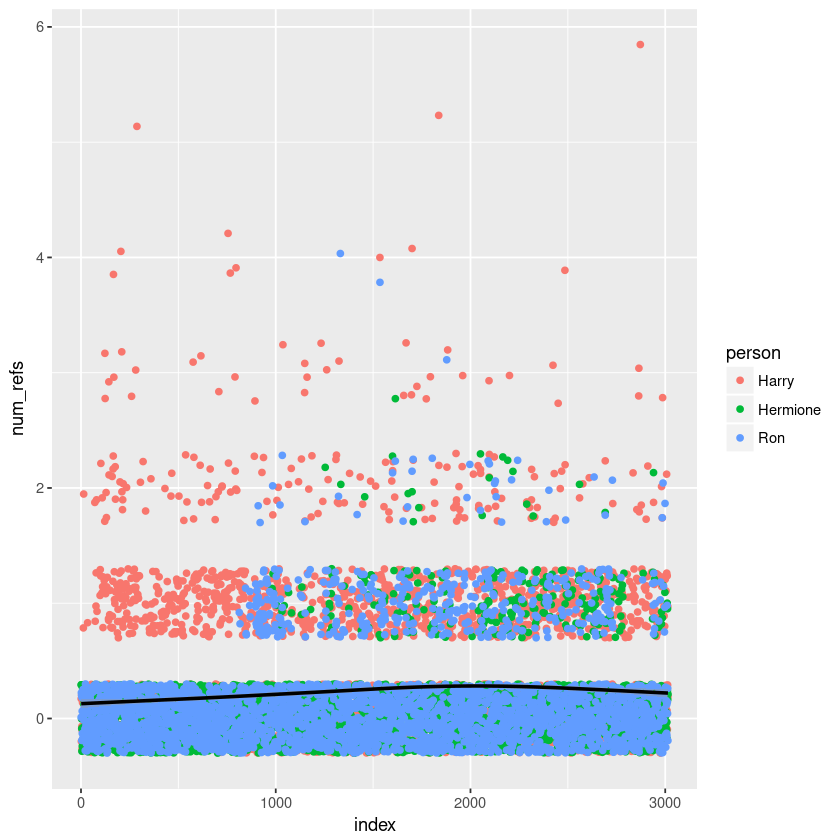

In [22]:
paragraph_df <- paragraph_df %>%
  mutate(harry_ron_mentioned = as.factor(Harry > 0 & Ron > 0))
paragraph_df <- paragraph_df %>%
  mutate(hermione_mentioned = as.factor(Hermione > 0))

ggplot(filter(person_refs, person == 'Harry' | person == 'Hermione' | person == 'Ron'), aes(x = index, y = num_refs, color = person)) +
  geom_jitter(width = .3, height = .3) +
  geom_smooth(color = 'black')

ggplot(paragraph_df, aes(x = harry_ron_mentioned, y = Hermione)) +
  geom_jitter(width = .3, height = .3) +

tmp <- lm(Hermione ~ Harry + Ron, filter(paragraph_df, Harry > 0 & Ron > 0))
  summary(tmp)
  plot(tmp)